In [4]:
import numpy as np
import pandas as pd
from scipy import ndimage

import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep
import matplotlib.pyplot as plt

Working with 8855 images
Image examples: 
2020-10-25_1900_0.png


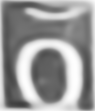

2020-10-25_1900_1.png


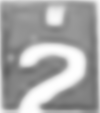

In [5]:
folder = "Images"
onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))

In [6]:
df = pd.read_csv('labels.csv', index_col='filename')  

train_files = []
test_files = []
train_labels = []
test_labels = []

In [7]:
len(onlyfiles)

8855

In [8]:
i = 0
for _file in onlyfiles:
    i += 1
    try:
        k = df.loc[_file]['label']
        print(i, _file)
        if (i%5) == 0:
            test_files.append(_file)
            test_labels.append(int(k))
        else:
            train_files.append(_file)
            train_labels.append(int(k))
    except KeyError:
        print(i, 'KeyError', _file)
        continue
    
print("Files in train_files: %d" % len(train_files))

1 2020-10-25_1340_0.png
2 2020-10-25_1340_1.png
3 2020-10-25_1340_2.png
4 2020-10-25_1340_3.png
5 KeyError 2020-10-25_1340_4.png
6 2020-10-25_1400_0.png
7 2020-10-25_1400_1.png
8 2020-10-25_1400_2.png
9 2020-10-25_1400_3.png
10 KeyError 2020-10-25_1400_4.png
11 2020-10-25_1404_0.png
12 2020-10-25_1404_1.png
13 2020-10-25_1404_2.png
14 2020-10-25_1404_3.png
15 KeyError 2020-10-25_1404_4.png
16 2020-10-25_1418_0.png
17 2020-10-25_1418_1.png
18 2020-10-25_1418_2.png
19 2020-10-25_1418_3.png
20 KeyError 2020-10-25_1418_4.png
21 2020-10-25_1500_0.png
22 2020-10-25_1500_1.png
23 2020-10-25_1500_2.png
24 2020-10-25_1500_3.png
25 KeyError 2020-10-25_1500_4.png
26 2020-10-25_1600_0.png
27 2020-10-25_1600_1.png
28 2020-10-25_1600_2.png
29 2020-10-25_1600_3.png
30 KeyError 2020-10-25_1600_4.png
31 2020-10-25_1700_0.png
32 2020-10-25_1700_1.png
33 2020-10-25_1700_2.png
34 2020-10-25_1700_3.png
35 KeyError 2020-10-25_1700_4.png
36 2020-10-25_1800_0.png
37 2020-10-25_1800_1.png
38 2020-10-25_1800_2.

409 2020-10-28_2000_3.png
410 KeyError 2020-10-28_2000_4.png
411 2020-10-28_2100_0.png
412 2020-10-28_2100_1.png
413 2020-10-28_2100_2.png
414 2020-10-28_2100_3.png
415 KeyError 2020-10-28_2100_4.png
416 2020-10-28_2200_0.png
417 2020-10-28_2200_1.png
418 2020-10-28_2200_2.png
419 2020-10-28_2200_3.png
420 KeyError 2020-10-28_2200_4.png
421 2020-10-28_2300_0.png
422 2020-10-28_2300_1.png
423 2020-10-28_2300_2.png
424 2020-10-28_2300_3.png
425 KeyError 2020-10-28_2300_4.png
426 2020-10-29_0000_0.png
427 2020-10-29_0000_1.png
428 2020-10-29_0000_2.png
429 2020-10-29_0000_3.png
430 KeyError 2020-10-29_0000_4.png
431 2020-10-29_0100_0.png
432 2020-10-29_0100_1.png
433 2020-10-29_0100_2.png
434 2020-10-29_0100_3.png
435 KeyError 2020-10-29_0100_4.png
436 2020-10-29_0200_0.png
437 2020-10-29_0200_1.png
438 2020-10-29_0200_2.png
439 2020-10-29_0200_3.png
440 KeyError 2020-10-29_0200_4.png
441 2020-10-29_0300_0.png
442 2020-10-29_0300_1.png
443 2020-10-29_0300_2.png
444 2020-10-29_0300_3.png
4

835 KeyError 2020-11-01_0900_4.png
836 2020-11-01_1000_0.png
837 2020-11-01_1000_1.png
838 2020-11-01_1000_2.png
839 2020-11-01_1000_3.png
840 KeyError 2020-11-01_1000_4.png
841 2020-11-01_1100_0.png
842 2020-11-01_1100_1.png
843 2020-11-01_1100_2.png
844 2020-11-01_1100_3.png
845 KeyError 2020-11-01_1100_4.png
846 2020-11-01_1200_0.png
847 2020-11-01_1200_1.png
848 2020-11-01_1200_2.png
849 2020-11-01_1200_3.png
850 KeyError 2020-11-01_1200_4.png
851 2020-11-01_1300_0.png
852 2020-11-01_1300_1.png
853 2020-11-01_1300_2.png
854 2020-11-01_1300_3.png
855 KeyError 2020-11-01_1300_4.png
856 2020-11-01_1400_0.png
857 2020-11-01_1400_1.png
858 2020-11-01_1400_2.png
859 2020-11-01_1400_3.png
860 KeyError 2020-11-01_1400_4.png
861 2020-11-01_1500_0.png
862 2020-11-01_1500_1.png
863 2020-11-01_1500_2.png
864 2020-11-01_1500_3.png
865 KeyError 2020-11-01_1500_4.png
866 2020-11-01_1600_0.png
867 2020-11-01_1600_1.png
868 2020-11-01_1600_2.png
869 2020-11-01_1600_3.png
870 KeyError 2020-11-01_160

1440 KeyError 2020-11-06_1000_4.png
1441 2020-11-06_1100_0.png
1442 2020-11-06_1100_1.png
1443 2020-11-06_1100_2.png
1444 2020-11-06_1100_3.png
1445 KeyError 2020-11-06_1100_4.png
1446 2020-11-06_1200_0.png
1447 2020-11-06_1200_1.png
1448 2020-11-06_1200_2.png
1449 2020-11-06_1200_3.png
1450 KeyError 2020-11-06_1200_4.png
1451 2020-11-06_1300_0.png
1452 2020-11-06_1300_1.png
1453 2020-11-06_1300_2.png
1454 2020-11-06_1300_3.png
1455 KeyError 2020-11-06_1300_4.png
1456 2020-11-06_1400_0.png
1457 2020-11-06_1400_1.png
1458 2020-11-06_1400_2.png
1459 2020-11-06_1400_3.png
1460 KeyError 2020-11-06_1400_4.png
1461 2020-11-06_1500_0.png
1462 2020-11-06_1500_1.png
1463 2020-11-06_1500_2.png
1464 2020-11-06_1500_3.png
1465 KeyError 2020-11-06_1500_4.png
1466 2020-11-06_1600_0.png
1467 2020-11-06_1600_1.png
1468 2020-11-06_1600_2.png
1469 2020-11-06_1600_3.png
1470 KeyError 2020-11-06_1600_4.png
1471 2020-11-06_1700_0.png
1472 2020-11-06_1700_1.png
1473 2020-11-06_1700_2.png
1474 2020-11-06_170

2040 KeyError 2020-11-11_1000_4.png
2041 2020-11-11_1100_0.png
2042 2020-11-11_1100_1.png
2043 2020-11-11_1100_2.png
2044 2020-11-11_1100_3.png
2045 KeyError 2020-11-11_1100_4.png
2046 2020-11-11_1200_0.png
2047 2020-11-11_1200_1.png
2048 2020-11-11_1200_2.png
2049 2020-11-11_1200_3.png
2050 KeyError 2020-11-11_1200_4.png
2051 2020-11-11_1300_0.png
2052 2020-11-11_1300_1.png
2053 2020-11-11_1300_2.png
2054 2020-11-11_1300_3.png
2055 KeyError 2020-11-11_1300_4.png
2056 2020-11-11_1400_0.png
2057 2020-11-11_1400_1.png
2058 2020-11-11_1400_2.png
2059 2020-11-11_1400_3.png
2060 KeyError 2020-11-11_1400_4.png
2061 2020-11-11_1500_0.png
2062 2020-11-11_1500_1.png
2063 2020-11-11_1500_2.png
2064 2020-11-11_1500_3.png
2065 KeyError 2020-11-11_1500_4.png
2066 2020-11-11_1600_0.png
2067 2020-11-11_1600_1.png
2068 2020-11-11_1600_2.png
2069 2020-11-11_1600_3.png
2070 KeyError 2020-11-11_1600_4.png
2071 2020-11-11_1700_0.png
2072 2020-11-11_1700_1.png
2073 2020-11-11_1700_2.png
2074 2020-11-11_170

2504 2020-11-15_0700_3.png
2505 KeyError 2020-11-15_0700_4.png
2506 2020-11-15_0800_0.png
2507 2020-11-15_0800_1.png
2508 2020-11-15_0800_2.png
2509 2020-11-15_0800_3.png
2510 KeyError 2020-11-15_0800_4.png
2511 2020-11-15_0900_0.png
2512 2020-11-15_0900_1.png
2513 2020-11-15_0900_2.png
2514 2020-11-15_0900_3.png
2515 KeyError 2020-11-15_0900_4.png
2516 2020-11-15_1000_0.png
2517 2020-11-15_1000_1.png
2518 2020-11-15_1000_2.png
2519 2020-11-15_1000_3.png
2520 KeyError 2020-11-15_1000_4.png
2521 2020-11-15_1100_0.png
2522 2020-11-15_1100_1.png
2523 2020-11-15_1100_2.png
2524 2020-11-15_1100_3.png
2525 KeyError 2020-11-15_1100_4.png
2526 2020-11-15_1200_0.png
2527 2020-11-15_1200_1.png
2528 2020-11-15_1200_2.png
2529 2020-11-15_1200_3.png
2530 KeyError 2020-11-15_1200_4.png
2531 2020-11-15_1300_0.png
2532 2020-11-15_1300_1.png
2533 2020-11-15_1300_2.png
2534 2020-11-15_1300_3.png
2535 KeyError 2020-11-15_1300_4.png
2536 2020-11-15_1400_0.png
2537 2020-11-15_1400_1.png
2538 2020-11-15_140

3018 2020-11-19_1400_2.png
3019 2020-11-19_1400_3.png
3020 KeyError 2020-11-19_1400_4.png
3021 2020-11-19_1500_0.png
3022 2020-11-19_1500_1.png
3023 2020-11-19_1500_2.png
3024 2020-11-19_1500_3.png
3025 KeyError 2020-11-19_1500_4.png
3026 2020-11-19_1600_0.png
3027 2020-11-19_1600_1.png
3028 2020-11-19_1600_2.png
3029 2020-11-19_1600_3.png
3030 KeyError 2020-11-19_1600_4.png
3031 2020-11-19_1700_0.png
3032 2020-11-19_1700_1.png
3033 2020-11-19_1700_2.png
3034 2020-11-19_1700_3.png
3035 KeyError 2020-11-19_1700_4.png
3036 2020-11-19_1800_0.png
3037 2020-11-19_1800_1.png
3038 2020-11-19_1800_2.png
3039 2020-11-19_1800_3.png
3040 KeyError 2020-11-19_1800_4.png
3041 2020-11-19_1900_0.png
3042 2020-11-19_1900_1.png
3043 2020-11-19_1900_2.png
3044 2020-11-19_1900_3.png
3045 KeyError 2020-11-19_1900_4.png
3046 2020-11-19_2000_0.png
3047 2020-11-19_2000_1.png
3048 2020-11-19_2000_2.png
3049 2020-11-19_2000_3.png
3050 KeyError 2020-11-19_2000_4.png
3051 2020-11-19_2100_0.png
3052 2020-11-19_210

3531 2020-11-23_2100_0.png
3532 2020-11-23_2100_1.png
3533 2020-11-23_2100_2.png
3534 2020-11-23_2100_3.png
3535 KeyError 2020-11-23_2100_4.png
3536 2020-11-23_2200_0.png
3537 2020-11-23_2200_1.png
3538 2020-11-23_2200_2.png
3539 2020-11-23_2200_3.png
3540 KeyError 2020-11-23_2200_4.png
3541 2020-11-23_2300_0.png
3542 2020-11-23_2300_1.png
3543 2020-11-23_2300_2.png
3544 2020-11-23_2300_3.png
3545 KeyError 2020-11-23_2300_4.png
3546 2020-11-24_0000_0.png
3547 2020-11-24_0000_1.png
3548 2020-11-24_0000_2.png
3549 2020-11-24_0000_3.png
3550 KeyError 2020-11-24_0000_4.png
3551 2020-11-24_0100_0.png
3552 2020-11-24_0100_1.png
3553 2020-11-24_0100_2.png
3554 2020-11-24_0100_3.png
3555 KeyError 2020-11-24_0100_4.png
3556 2020-11-24_0200_0.png
3557 2020-11-24_0200_1.png
3558 2020-11-24_0200_2.png
3559 2020-11-24_0200_3.png
3560 KeyError 2020-11-24_0200_4.png
3561 2020-11-24_0300_0.png
3562 2020-11-24_0300_1.png
3563 2020-11-24_0300_2.png
3564 2020-11-24_0300_3.png
3565 KeyError 2020-11-24_030

4045 KeyError 2020-11-28_0300_4.png
4046 2020-11-28_0400_0.png
4047 2020-11-28_0400_1.png
4048 2020-11-28_0400_2.png
4049 2020-11-28_0400_3.png
4050 KeyError 2020-11-28_0400_4.png
4051 2020-11-28_0500_0.png
4052 2020-11-28_0500_1.png
4053 2020-11-28_0500_2.png
4054 2020-11-28_0500_3.png
4055 KeyError 2020-11-28_0500_4.png
4056 2020-11-28_0600_0.png
4057 2020-11-28_0600_1.png
4058 2020-11-28_0600_2.png
4059 2020-11-28_0600_3.png
4060 KeyError 2020-11-28_0600_4.png
4061 2020-11-28_0700_0.png
4062 2020-11-28_0700_1.png
4063 2020-11-28_0700_2.png
4064 2020-11-28_0700_3.png
4065 KeyError 2020-11-28_0700_4.png
4066 2020-11-28_0800_0.png
4067 2020-11-28_0800_1.png
4068 2020-11-28_0800_2.png
4069 2020-11-28_0800_3.png
4070 KeyError 2020-11-28_0800_4.png
4071 2020-11-28_0900_0.png
4072 2020-11-28_0900_1.png
4073 2020-11-28_0900_2.png
4074 2020-11-28_0900_3.png
4075 KeyError 2020-11-28_0900_4.png
4076 2020-11-28_1000_0.png
4077 2020-11-28_1000_1.png
4078 2020-11-28_1000_2.png
4079 2020-11-28_100

4578 2020-12-02_1400_2.png
4579 2020-12-02_1400_3.png
4580 KeyError 2020-12-02_1400_4.png
4581 2020-12-02_1500_0.png
4582 2020-12-02_1500_1.png
4583 2020-12-02_1500_2.png
4584 2020-12-02_1500_3.png
4585 KeyError 2020-12-02_1500_4.png
4586 2020-12-02_1600_0.png
4587 2020-12-02_1600_1.png
4588 2020-12-02_1600_2.png
4589 2020-12-02_1600_3.png
4590 KeyError 2020-12-02_1600_4.png
4591 2020-12-02_1700_0.png
4592 2020-12-02_1700_1.png
4593 2020-12-02_1700_2.png
4594 2020-12-02_1700_3.png
4595 KeyError 2020-12-02_1700_4.png
4596 2020-12-02_1800_0.png
4597 2020-12-02_1800_1.png
4598 2020-12-02_1800_2.png
4599 2020-12-02_1800_3.png
4600 KeyError 2020-12-02_1800_4.png
4601 2020-12-02_1900_0.png
4602 2020-12-02_1900_1.png
4603 2020-12-02_1900_2.png
4604 2020-12-02_1900_3.png
4605 KeyError 2020-12-02_1900_4.png
4606 2020-12-02_2000_0.png
4607 2020-12-02_2000_1.png
4608 2020-12-02_2000_2.png
4609 2020-12-02_2000_3.png
4610 KeyError 2020-12-02_2000_4.png
4611 2020-12-02_2100_0.png
4612 2020-12-02_210

5048 2020-12-06_1200_2.png
5049 2020-12-06_1200_3.png
5050 KeyError 2020-12-06_1200_4.png
5051 2020-12-06_1300_0.png
5052 2020-12-06_1300_1.png
5053 2020-12-06_1300_2.png
5054 2020-12-06_1300_3.png
5055 KeyError 2020-12-06_1300_4.png
5056 2020-12-06_1400_0.png
5057 2020-12-06_1400_1.png
5058 2020-12-06_1400_2.png
5059 2020-12-06_1400_3.png
5060 KeyError 2020-12-06_1400_4.png
5061 2020-12-06_1500_0.png
5062 2020-12-06_1500_1.png
5063 2020-12-06_1500_2.png
5064 2020-12-06_1500_3.png
5065 KeyError 2020-12-06_1500_4.png
5066 2020-12-06_1600_0.png
5067 2020-12-06_1600_1.png
5068 2020-12-06_1600_2.png
5069 2020-12-06_1600_3.png
5070 KeyError 2020-12-06_1600_4.png
5071 2020-12-06_1700_0.png
5072 2020-12-06_1700_1.png
5073 2020-12-06_1700_2.png
5074 2020-12-06_1700_3.png
5075 KeyError 2020-12-06_1700_4.png
5076 2020-12-06_1800_0.png
5077 2020-12-06_1800_1.png
5078 2020-12-06_1800_2.png
5079 2020-12-06_1800_3.png
5080 KeyError 2020-12-06_1800_4.png
5081 2020-12-06_1900_0.png
5082 2020-12-06_190

5541 2020-12-10_1500_0.png
5542 2020-12-10_1500_1.png
5543 2020-12-10_1500_2.png
5544 2020-12-10_1500_3.png
5545 KeyError 2020-12-10_1500_4.png
5546 2020-12-10_1600_0.png
5547 2020-12-10_1600_1.png
5548 2020-12-10_1600_2.png
5549 2020-12-10_1600_3.png
5550 KeyError 2020-12-10_1600_4.png
5551 2020-12-10_1700_0.png
5552 2020-12-10_1700_1.png
5553 2020-12-10_1700_2.png
5554 2020-12-10_1700_3.png
5555 KeyError 2020-12-10_1700_4.png
5556 2020-12-10_1800_0.png
5557 2020-12-10_1800_1.png
5558 2020-12-10_1800_2.png
5559 2020-12-10_1800_3.png
5560 KeyError 2020-12-10_1800_4.png
5561 2020-12-10_1900_0.png
5562 2020-12-10_1900_1.png
5563 2020-12-10_1900_2.png
5564 KeyError 2020-12-10_1900_3.png
5565 KeyError 2020-12-10_1900_4.png
5566 2020-12-10_2000_0.png
5567 2020-12-10_2000_1.png
5568 2020-12-10_2000_2.png
5569 2020-12-10_2000_3.png
5570 KeyError 2020-12-10_2000_4.png
5571 2020-12-10_2100_0.png
5572 2020-12-10_2100_1.png
5573 2020-12-10_2100_2.png
5574 2020-12-10_2100_3.png
5575 KeyError 2020-

6075 KeyError 2020-12-15_0100_4.png
6076 2020-12-15_0200_0.png
6077 2020-12-15_0200_1.png
6078 2020-12-15_0200_2.png
6079 2020-12-15_0200_3.png
6080 KeyError 2020-12-15_0200_4.png
6081 2020-12-15_0300_0.png
6082 2020-12-15_0300_1.png
6083 2020-12-15_0300_2.png
6084 2020-12-15_0300_3.png
6085 KeyError 2020-12-15_0300_4.png
6086 2020-12-15_0400_0.png
6087 2020-12-15_0400_1.png
6088 2020-12-15_0400_2.png
6089 2020-12-15_0400_3.png
6090 KeyError 2020-12-15_0400_4.png
6091 2020-12-15_0500_0.png
6092 2020-12-15_0500_1.png
6093 2020-12-15_0500_2.png
6094 2020-12-15_0500_3.png
6095 KeyError 2020-12-15_0500_4.png
6096 2020-12-15_0600_0.png
6097 2020-12-15_0600_1.png
6098 2020-12-15_0600_2.png
6099 2020-12-15_0600_3.png
6100 KeyError 2020-12-15_0600_4.png
6101 2020-12-15_0700_0.png
6102 2020-12-15_0700_1.png
6103 2020-12-15_0700_2.png
6104 2020-12-15_0700_3.png
6105 KeyError 2020-12-15_0700_4.png
6106 2020-12-15_0800_0.png
6107 2020-12-15_0800_1.png
6108 2020-12-15_0800_2.png
6109 2020-12-15_080

6579 2020-12-19_0600_3.png
6580 KeyError 2020-12-19_0600_4.png
6581 2020-12-19_0700_0.png
6582 2020-12-19_0700_1.png
6583 2020-12-19_0700_2.png
6584 2020-12-19_0700_3.png
6585 KeyError 2020-12-19_0700_4.png
6586 2020-12-19_0800_0.png
6587 2020-12-19_0800_1.png
6588 2020-12-19_0800_2.png
6589 2020-12-19_0800_3.png
6590 KeyError 2020-12-19_0800_4.png
6591 2020-12-19_0900_0.png
6592 2020-12-19_0900_1.png
6593 2020-12-19_0900_2.png
6594 2020-12-19_0900_3.png
6595 KeyError 2020-12-19_0900_4.png
6596 2020-12-19_1000_0.png
6597 2020-12-19_1000_1.png
6598 2020-12-19_1000_2.png
6599 2020-12-19_1000_3.png
6600 KeyError 2020-12-19_1000_4.png
6601 2020-12-19_1100_0.png
6602 2020-12-19_1100_1.png
6603 2020-12-19_1100_2.png
6604 2020-12-19_1100_3.png
6605 KeyError 2020-12-19_1100_4.png
6606 2020-12-19_1200_0.png
6607 2020-12-19_1200_1.png
6608 2020-12-19_1200_2.png
6609 2020-12-19_1200_3.png
6610 KeyError 2020-12-19_1200_4.png
6611 2020-12-19_1300_0.png
6612 2020-12-19_1300_1.png
6613 2020-12-19_130

7077 2020-12-23_1000_1.png
7078 2020-12-23_1000_2.png
7079 2020-12-23_1000_3.png
7080 KeyError 2020-12-23_1000_4.png
7081 2020-12-23_1100_0.png
7082 2020-12-23_1100_1.png
7083 2020-12-23_1100_2.png
7084 2020-12-23_1100_3.png
7085 KeyError 2020-12-23_1100_4.png
7086 2020-12-23_1200_0.png
7087 2020-12-23_1200_1.png
7088 2020-12-23_1200_2.png
7089 2020-12-23_1200_3.png
7090 KeyError 2020-12-23_1200_4.png
7091 2020-12-23_1300_0.png
7092 2020-12-23_1300_1.png
7093 2020-12-23_1300_2.png
7094 2020-12-23_1300_3.png
7095 KeyError 2020-12-23_1300_4.png
7096 2020-12-23_1400_0.png
7097 2020-12-23_1400_1.png
7098 2020-12-23_1400_2.png
7099 2020-12-23_1400_3.png
7100 KeyError 2020-12-23_1400_4.png
7101 2020-12-23_1500_0.png
7102 2020-12-23_1500_1.png
7103 2020-12-23_1500_2.png
7104 2020-12-23_1500_3.png
7105 KeyError 2020-12-23_1500_4.png
7106 2020-12-23_1600_0.png
7107 2020-12-23_1600_1.png
7108 2020-12-23_1600_2.png
7109 2020-12-23_1600_3.png
7110 KeyError 2020-12-23_1600_4.png
7111 2020-12-23_170

7590 KeyError 2020-12-27_1600_4.png
7591 2020-12-27_1700_0.png
7592 2020-12-27_1700_1.png
7593 2020-12-27_1700_2.png
7594 2020-12-27_1700_3.png
7595 KeyError 2020-12-27_1700_4.png
7596 2020-12-27_1800_0.png
7597 2020-12-27_1800_1.png
7598 2020-12-27_1800_2.png
7599 2020-12-27_1800_3.png
7600 KeyError 2020-12-27_1800_4.png
7601 2020-12-27_1900_0.png
7602 2020-12-27_1900_1.png
7603 2020-12-27_1900_2.png
7604 2020-12-27_1900_3.png
7605 KeyError 2020-12-27_1900_4.png
7606 2020-12-27_2000_0.png
7607 2020-12-27_2000_1.png
7608 2020-12-27_2000_2.png
7609 KeyError 2020-12-27_2000_3.png
7610 KeyError 2020-12-27_2000_4.png
7611 2020-12-27_2100_0.png
7612 2020-12-27_2100_1.png
7613 2020-12-27_2100_2.png
7614 2020-12-27_2100_3.png
7615 KeyError 2020-12-27_2100_4.png
7616 2020-12-27_2200_0.png
7617 2020-12-27_2200_1.png
7618 2020-12-27_2200_2.png
7619 2020-12-27_2200_3.png
7620 KeyError 2020-12-27_2200_4.png
7621 2020-12-27_2300_0.png
7622 2020-12-27_2300_1.png
7623 2020-12-27_2300_2.png
7624 2020-

8071 KeyError 2020-12-31_1700_0.png
8072 KeyError 2020-12-31_1700_1.png
8073 KeyError 2020-12-31_1700_2.png
8074 KeyError 2020-12-31_1700_3.png
8075 KeyError 2020-12-31_1700_4.png
8076 KeyError 2020-12-31_1800_0.png
8077 KeyError 2020-12-31_1800_1.png
8078 KeyError 2020-12-31_1800_2.png
8079 KeyError 2020-12-31_1800_3.png
8080 KeyError 2020-12-31_1800_4.png
8081 KeyError 2020-12-31_1900_0.png
8082 KeyError 2020-12-31_1900_1.png
8083 KeyError 2020-12-31_1900_2.png
8084 KeyError 2020-12-31_1900_3.png
8085 KeyError 2020-12-31_1900_4.png
8086 KeyError 2020-12-31_2000_0.png
8087 KeyError 2020-12-31_2000_1.png
8088 KeyError 2020-12-31_2000_2.png
8089 KeyError 2020-12-31_2000_3.png
8090 KeyError 2020-12-31_2000_4.png
8091 KeyError 2020-12-31_2100_0.png
8092 KeyError 2020-12-31_2100_1.png
8093 KeyError 2020-12-31_2100_2.png
8094 KeyError 2020-12-31_2100_3.png
8095 KeyError 2020-12-31_2100_4.png
8096 KeyError 2020-12-31_2200_0.png
8097 KeyError 2020-12-31_2200_1.png
8098 KeyError 2020-12-31_220

8655 KeyError 2021-01-05_1300_4.png
8656 KeyError 2021-01-05_1400_0.png
8657 KeyError 2021-01-05_1400_1.png
8658 KeyError 2021-01-05_1400_2.png
8659 KeyError 2021-01-05_1400_3.png
8660 KeyError 2021-01-05_1400_4.png
8661 KeyError 2021-01-05_1500_0.png
8662 KeyError 2021-01-05_1500_1.png
8663 KeyError 2021-01-05_1500_2.png
8664 KeyError 2021-01-05_1500_3.png
8665 KeyError 2021-01-05_1500_4.png
8666 KeyError 2021-01-05_1600_0.png
8667 KeyError 2021-01-05_1600_1.png
8668 KeyError 2021-01-05_1600_2.png
8669 KeyError 2021-01-05_1600_3.png
8670 KeyError 2021-01-05_1600_4.png
8671 KeyError 2021-01-05_1700_0.png
8672 KeyError 2021-01-05_1700_1.png
8673 KeyError 2021-01-05_1700_2.png
8674 KeyError 2021-01-05_1700_3.png
8675 KeyError 2021-01-05_1700_4.png
8676 KeyError 2021-01-05_1800_0.png
8677 KeyError 2021-01-05_1800_1.png
8678 KeyError 2021-01-05_1800_2.png
8679 KeyError 2021-01-05_1800_3.png
8680 KeyError 2021-01-05_1800_4.png
8681 KeyError 2021-01-05_1900_0.png
8682 KeyError 2021-01-05_190

In [9]:
train_labels

[0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,
 3,
 6,
 0,
 2,


In [10]:
# Original Dimensions
image_width = 28
image_height = 28

trainset = np.ndarray(shape=(len(train_files), image_height, image_width), dtype=np.float32)

i = 0
for _file in train_files:
    img = Image.open(folder + "/" + _file)  # this is a PIL image
    img = img.resize((image_width, image_height))
    x = np.array(img)
    trainset[i] = x
    if i % 1000 == 0:
        print("%d images to array" % i)
    i += 1
print("%d images to array!"%i)

testset = np.ndarray(shape=(len(test_files), image_height, image_width), dtype=np.float32)

i = 0
for _file in test_files:
    img = Image.open(folder + "/" + _file)  # this is a PIL image
    img = img.resize((image_width, image_height))
    x = np.array(img)
    testset[i] = x
    if i % 1000 == 0:
        print("%d images to array" % i)
    i += 1
print("%d images to array!"%i)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

0 images to array
1000 images to array
2000 images to array
3000 images to array
4000 images to array
5000 images to array
6000 images to array
6141 images to array!
0 images to array!


In [11]:
np.savez_compressed('numbers', trainset=trainset, train_labels=train_labels, testset=testset, test_labels=test_labels)